## Integrantes
* Andrea Mejia
* Renzo Richle
* Lucio Cornejo
* Claudia Vivas

1. [Paso 2](#paso-2)
    - [Adquisición de Datos](#adquisicion-de-datos)
2. [Paso 3](#paso-3)
    - [Entendimiento de los datos](#entendimiento-de-los-datos)
    - [Duplicados](#duplicados)
    - [Vacios](#vacios)
    - [Medidas de resumen para variables numéricas](#medidas-de-resumen-para-variables-numericas)
    - [Medidas de resumen para variables categóricas](#medidas-de-resumen-para-variables-categoricas)
    - [Tratamiento de datos atípicos](#tratamiento-de-datos-atipicos)
        - [Outliers por exceso](#outliers-por-exceso)
        - [Outliers por defecto](#outliers-por-defecto)
        - [Separar la base en atipicos y no atipicos](#separar-la-base-en-atipicos-y-no-atipicos)
    

## Paso 2: Adquisicion de Datos

In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [354]:
# Cargamos la base de datos
#tracks = pd.read_csv(r'E:\Documentos\Github\proyecto-analisis-de-datos-1INF03\datos\tracks.csv')
# tracks = pd.read_csv(r'F:\2022-1\Analisis de datos\Tarea Academica\archive\tracks.csv')
tracks = pd.read_csv("../datos/tracks.csv")

In [355]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Notamos que algunas de las columnas nos generan la misma información, pese a su presentación diferente.

Por ejemplo, la variable **id_artists** es un identificador único por artista, así que 
nos proporciona casi completamente la misma información que la variable **artists** (nombre del artista).

Análogamente sucede para las variables **id** (identificador de la canción) y **name** (nombre de la canción).

Sin embargo, debido a la posibilidad de que existan canciones con el mismo nombre,
o artistas con el mismo nombre _musical_, no descartaremos, por ahora, a las columnas **id** e **id_artists**,
en caso resulten necesarias más adelante en el análisis.

## Paso 3: Entendimiento de los datos

In [356]:
print('La base tiene', tracks.shape[0], 'filas y', tracks.shape[1], 'columnas')

La base tiene 586672 filas y 20 columnas


In [357]:
print('Las columnas se la base se llaman:', tracks.columns.to_list())

Las columnas se la base se llaman: ['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [358]:
tracks.dtypes
print('Se tiene los siguientes tipos de datos por columna: \n',tracks.dtypes)

Se tiene los siguientes tipos de datos por columna: 
 id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


En base a la documentación del API de Spotify, se tiene la siguiente
decripción de las variables:

Variable | Descripción | Tipo de dato
:---: | :---: | :---:
id | Identificador de la canción | string
name | Nombre de la canción | string
popularity | Popularidad | int
duration_ms | La duración del track en milisegundos | int
explicit | Si el track cuenta con las letras proporcionadas por el servicio de Explicit | boolean
artists | El artista del track | object artist
id_artists | El id del artista del track | object artist
release_date | Fecha de lanzamiento | string
danceability | Describe qué tan adecuada es una pista para bailar n valor de 0,0 es menos bailable y 1,0 es el más bailable | float
energy | La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. | float
key | Indica el centro tonal de la canción, representando a las doce principales notas musicales vía los enteros entre 0 y 11. | int
loudness | Volumen de la pista en decibelios  | float
mode | Indica la modalidad (mayor (1) o menor (0) ) de una canción. | int 
speechiness | Valor entre 0 y 1, donde la cercanía a 1 representa más palabras cantadas en la canción. | float
instrumentalness | Predicción sobre la presencia o ausencia de algún cantante en la canción. | float
acousticness | Proporción de la parte vocal en la canción; cerca a 1 significa menos parte vocal | float
liveness | Detecta la presencia de una audiencia en la grabación | float
valence | Describe la positividad emocional de una pista | float
tempo | La rapidez general de la canción, estimada en pulsaciones por minuto | float
time_signature | Especifica cuántos pulsos hay en cada compás | int 

In [359]:
# Descripción de los datos
tracks.info()

type(tracks.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

pandas.core.indexes.base.Index

In [360]:
# Convertimos las variables object a variables string 
tracks[['id', 'name', 'artists', 'id_artists']] = tracks[['id', 'name', 'artists', 'id_artists']].astype('string')

In [361]:
# Convertimos la variable 'release_date', de object a datetime64[ns]
tracks['release_date'] = pd.to_datetime(tracks['release_date'], format = "%Y-%m-%d")

### Datos duplicados

In [362]:
# Como cada fila de este dataset corresponde a una canción diferente,
# omitimos los duplicados vía el identificador de cada canción
print(tracks.shape)
tracks.drop_duplicates(subset = 'id', inplace = True)
print(tracks.shape)

(586672, 20)
(586672, 20)


Se observa que los datos no tienen filas con valores duplicados, es decir, no existen registros repetidos.

### Datos vacíos

In [363]:
# Contabilizamos vacíos
vacios = pd.DataFrame(tracks.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/tracks.shape[0], 2)*100
vacios 

,vacios,vacios%
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
key,0,0.0
energy,0,0.0


Encontramos que solo la columna "name" almacena valores vacios, en particular, 71.

Como se comentó en el paso dos, es posible que la columna "name" se trate de un identificador.
Asimismo, la información de la columna "id" identifica a las canciones, así que, como
la variable "id" **no presenta valores vacíos**, no es necesario remover las filas
asociadas a valores vacíos de la columna "name".

Más bien, basta descartar a la columna "name", pues su información podemo obtenerla
vía la variable "id".

### Medidas de resumen para variables numericas

In [364]:
# Separación de variables en numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

In [365]:
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586672, 5)
Variables numéricas (586672, 15)


In [366]:
# Estadisticos desciptivas para las variables numéricas
dfnum.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [367]:
# Distribuciones de los datos numéricos
columnas_numericas = dfnum.columns.tolist()
sns.set(style = "darkgrid")
# for col in columnas_numericas:
#   sns.distplot(dfnum[col])
#   plt.title(col)
#   plt.show()

Note entonces que las variables **explicit**, **key**, **mode** y **time_signature** no parecen ser variables numéricas.

En base a la descripción de tales variabes, como se observa en la tabla presentada en el paso 2,
convertiremos aquellas tres variables a strings, por tratarse de valores categóricos.

En particular, la variable **explicit** es un boolean. 

Por ello, volvemos a separar en dos grupos a las variables del dataset en original.

In [368]:
# Variable explicit
print(tracks[["explicit"]].value_counts())
# Como tal variable vale 0 o 1, y, según su definición
# es de tipo boolean, no es necesario convertirla a boolean.
# La convertirmos a string para separar la data en variables
# númericas y categóricas.

# Variables string
tracks[["key", "mode", "time_signature", "explicit"]] = tracks[["key", "mode", "time_signature", "explicit"]].astype('string')

# División de variables numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

# Nuevas dimensiones
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)


explicit
0           560808
1            25864
dtype: int64
Variables categóricas (586672, 9)
Variables numéricas (586672, 11)


### Medidas de resumen para variables categóricas

In [193]:
# Comparamos las variables, posiblemente idénticas en 
# información, "id" y "name"
for columna in dfcat.columns[0:2]:
  print(dfcat[columna].value_counts())

35iwgR4jXetI318WEWsa1Q    1
0BRXJHRNGQ3W4v9frnSfhu    1
0grXU6GKVNCVMJbseA0Uhe    1
2u7t2vcrLxKp69Um0MDEs2    1
0IgI1UCz84pYeVetnl1lGP    1
                         ..
6IGuPIQaRd7PPsKO35N1dv    1
1dKxf4Ht2SsKLyXfSDJAgy    1
4ow9HehIdFii1cggylW2k0    1
29NewYj57n6o1CFwmm03mp    1
5Ocn6dZ3BJFPWh4ylwFXtn    1
Name: id, Length: 586672, dtype: Int64
Summertime                                101
Intro                                      92
Year 3000                                  91
Hold On                                    87
2000 Years                                 76
                                         ... 
Ententanz (Dance Little Bird)               1
So sehr dabei - Live / Remastered 2014      1
Vertige De L'Amour                          1
Mêmeil et Marie                             1
A Day At A Time                             1
Name: name, Length: 446474, dtype: Int64


Notamos entonces que la variable **name** presenta repeticiones en algunas de sus categorías.

En base a lo explicado en el paso 2, optaremos por descartar, más adelante, la columna **name**, 

porque realizaremos algunas transformaciones para este dato, con fin exploratorio de la data.

In [169]:
# Comparamos las variables, posiblemente idénticas en 
# información, "artists" e "id_artists"
dfcat["artists"].value_counts().tolist() == dfcat["id_artists"].value_counts().tolist()

False

En base a lo explicado en el paso 2, y a que no se cumple la igualdad anterior entre listas,
descartaremos la columna **artists**.

In [170]:
print(dfcat.shape)
dfcat.drop(["artists"], axis = 1, inplace = True)
print(dfcat.shape)

(586672, 8)
(586672, 7)


In [171]:
print(dfcat[['release_date']].mode())
print(dfcat['release_date'].median())

  release_date
0   1997-01-01
1992-07-31 00:00:00


In [197]:
dfcat.dtypes

id                        string
name                      string
explicit                  string
artists                   string
id_artists                string
release_date      datetime64[ns]
key                       string
mode                      string
time_signature            string
dtype: object

Como las variables **id** e **id_artists** son Identificadores,
no vale la pena describir sus estadísticos. 

Consideremos entonces solo a las variables categóricas
**release_date**, **key**, **mode** y **time_signature**.

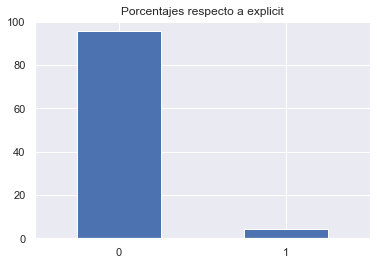

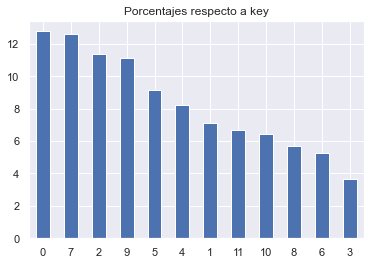

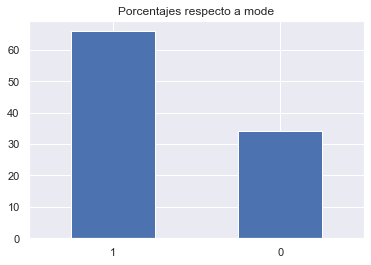

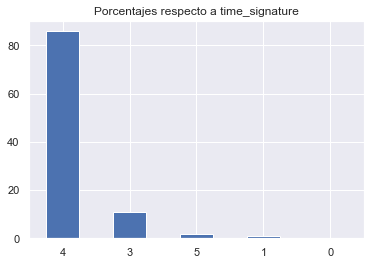

In [198]:
for columna in ["explicit", "key", "mode", "time_signature"]:
  (100 * dfcat[columna].value_counts() / len(dfcat[columna])).plot(
    kind = "bar",
    title = f"Porcentajes respecto a {columna}", 
    rot = 0
  )
  plt.show()

### **Tratamiento de Datos Atípicos y Estadísticas Descriptivas**

### Tratamiento de datos atípicos

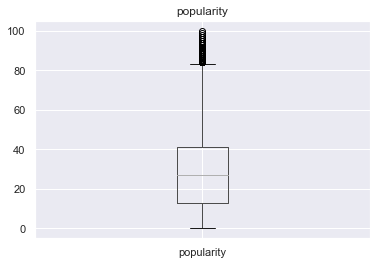

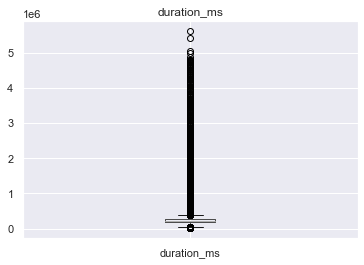

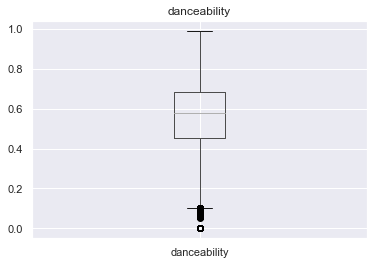

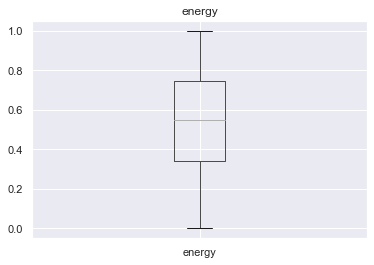

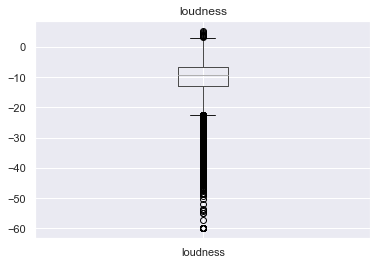

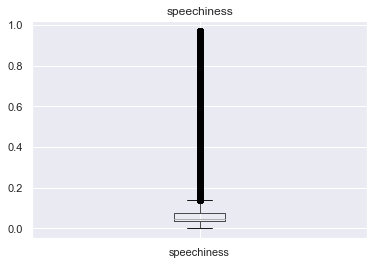

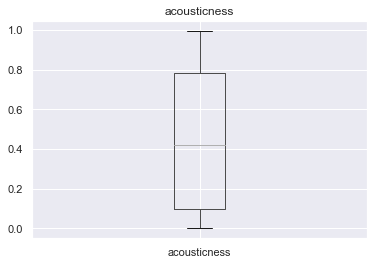

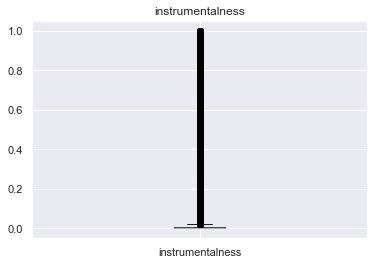

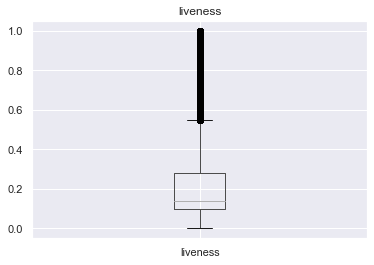

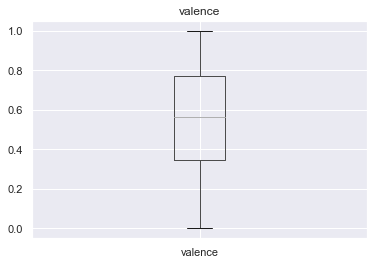

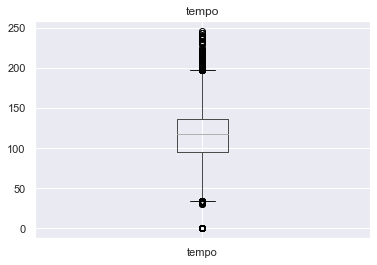

In [199]:
# Graficamos los boxplots de las variables numéricas
columnas = dfnum.columns.to_list()

for columna in columnas:
  dfnum.boxplot(column = columna)
  plt.title(columna)
  plt.show()


Respecto a la manera estándar pata calcular valores atípicos, se observa que casi todas las
filas numéricas presentarían outliers. Sin embargo, aquel criterio estándar es de utilidad
cuando la variable analizada posee una distribución aproximadamente gaussiana.

Por ello, generemos **Q-Q plots** para darnos una idea de qué tan gaussianas
son las distribuciones de nuestras variables numéricas.

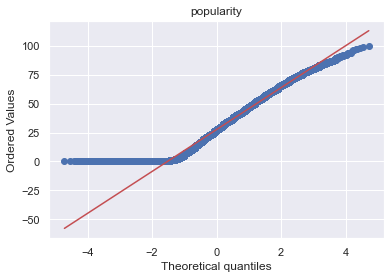

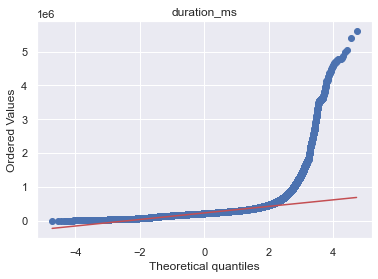

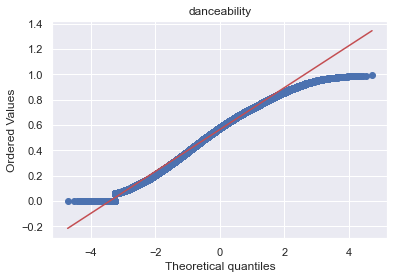

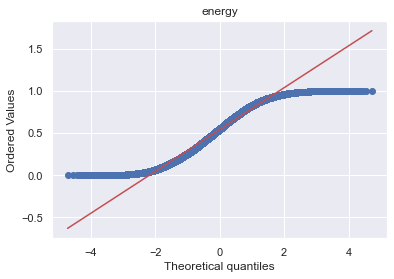

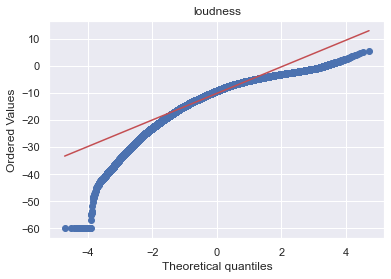

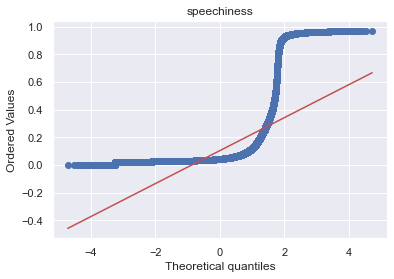

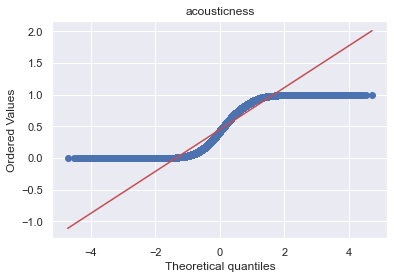

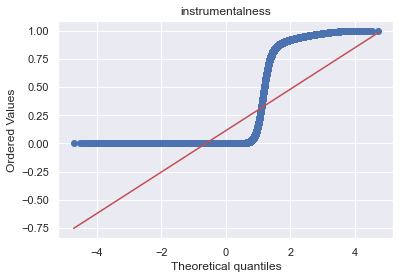

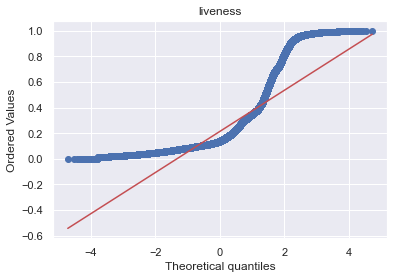

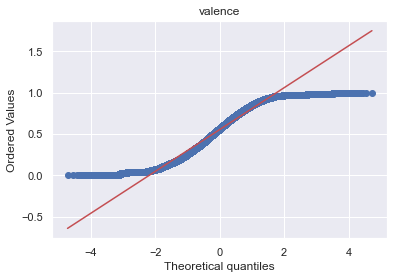

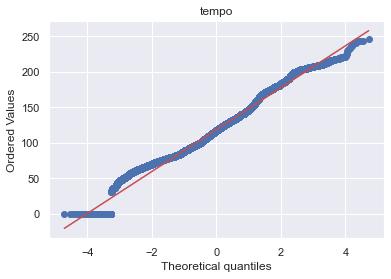

In [86]:
import pylab 
import scipy.stats as stats

# La funcion select_dtypes genera un data frame formado únicamente por
# columnas del tipo indicado como argumento
for col in dfnum.select_dtypes('number').columns:
  stats.probplot(dfnum[col], dist = "norm", plot = plt)
  plt.title(col)
  pylab.show()

Se observa que las variables no siguen una distribución gaussiana.

Por ello, en este contexto, el tratamiento de outliers debería ser revisando variable por variable.

#### Datos numéricos

In [200]:
# Generamos percentiles para cada variable numérica
Percentiles = dfnum.describe(percentiles = list(np.arange(0, 1, 0.01)))

In [231]:
Percentiles.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,230051.167286,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,18.370642,126526.087418,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,0.000000,3344.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,3344.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [332]:
# Definimos una función para analizar la distribución de las variable,
# ayudándonos a definir nuevos whiskers, apropiados a la variable graficada
def analisis_outliers(columna, coeficiente):
  sns.distplot(dfnum[columna])
  # Rectas verticales para la media y mediana
  plt.axvline(dfnum[columna].mean(), color = "red", linestyle = "--")
  plt.axvline(dfnum[columna].median(), color = "green", linestyle = "--")
  
  # Cuartiles estándares
  plt.axvline(dfnum[columna].quantile(0.25), color = "black", linestyle = "--")
  plt.axvline(dfnum[columna].quantile(0.75), color = "black", linestyle = "--") 
  
  # Whiskers no estándares 
  whisker_superior_teorico = Percentiles[columna].loc['75%'] + (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  whisker_inferior_teorico = Percentiles[columna].loc['75%'] - (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  # Comparamos respecto al máximo y mínimo de la data,
  # y redefinimos los whiskers, de ser necesario
  if dfnum[columna].max() < whisker_superior_teorico:
    whisker_superior_teorico = dfnum[columna].max()
  if dfnum[columna].min() > whisker_inferior_teorico:
    whisker_inferior_teorico = dfnum[columna].min() #  
  # Graficar los nuevos whiskers
  plt.axvline(whisker_superior_teorico, color = "yellow", linestyle = "--") # outlier por exceso
  plt.axvline(whisker_inferior_teorico, color = "yellow", linestyle = "--") # outlier por defecto

  plt.show()

  outlier = (dfnum[columna] > whisker_superior_teorico) | (dfnum[columna] < whisker_inferior_teorico)
  print(f"Porcentaje de valores atípicos: {(dfnum[columna].loc[outlier].shape[0]/dfnum[columna].shape[0])*100}")
  print("Valores atípicos de la variable seleccionada:")
  print(dfnum[columna].loc[outlier])

# Definimos una función para hallar los índices de los outliers que encontremos con la función previa
def indices_outliers(columna, coeficiente):
  whisker_superior_teorico = Percentiles[columna].loc['75%'] + (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  whisker_inferior_teorico = Percentiles[columna].loc['75%'] - (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  if dfnum[columna].max() < whisker_superior_teorico:
    whisker_superior_teorico = dfnum[columna].max()
  if dfnum[columna].min() > whisker_inferior_teorico:
    whisker_inferior_teorico = dfnum[columna].min() 

  outliers = (dfnum[columna] > whisker_superior_teorico) | (dfnum[columna] < whisker_inferior_teorico)
  return (outliers[outliers == True].index.to_list())


A continuación, trabajaremos caso por caso para las variables en **dfnum**, con el fin de determinar
whiskers apropiados que nos permitan identificar valores atipicos, tales que aquellos valores atípicos
realmente se alejen de la mediana o media de la variable analizada, y que el porcentaje de valores
atípicos obtenido no supere el 10% del total de datos, debido a que sino más adelante imputaríamos
un porcentaje significativo de la data de cada variable numérica, creando así mucha información
ficticia para los modelos predictivos a emplearse.

Particularmente, se explorarán diversos resultados tras cambiar el valor **coeficiente** de la función
`analisis_outliers(., .)`, columna por columna, hasta encontrar whiskers apropiados para cada variable.
Además, el valor de **coeficiente** que eventualmente escojamos como apropiado deberá cumplir que,
al emplear `analisis_outliers(., .)` para la misma columna y para valores menores que el coeficiente escogido
(no todos necesariamente ... **coeficiente** no se trata de un _ínfimo matemático_) 
el porcentaje de valores atípicos obtenidos supere el 10% del total de datos para tal columna numérica.


#### Loudness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


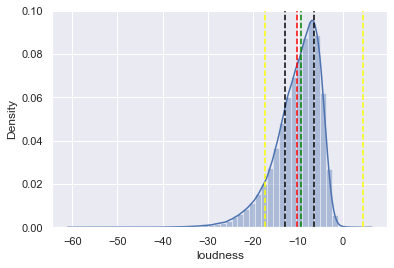

Porcentaje de valores atípicos: 8.955089044645048
Valores atípicos de la variable seleccionada:
1        -22.136
2        -21.180
3        -27.961
9        -23.228
10       -22.447
           ...  
586610   -33.845
586640   -29.059
586657   -28.573
586660   -27.689
586665   -25.551
Name: loudness, Length: 52537, dtype: float64


In [314]:
analisis_outliers('loudness', 1.7)

In [334]:
# Hallemos los índices de los outliers en la columna loudness
indices_outliers_loudness = indices_outliers("loudness", 1.7)
dfnum.loc[indices_outliers_loudness, "loudness"]

1        -22.136
2        -21.180
3        -27.961
9        -23.228
10       -22.447
           ...  
586610   -33.845
586640   -29.059
586657   -28.573
586660   -27.689
586665   -25.551
Name: loudness, Length: 52537, dtype: float64

#### instrumentalness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


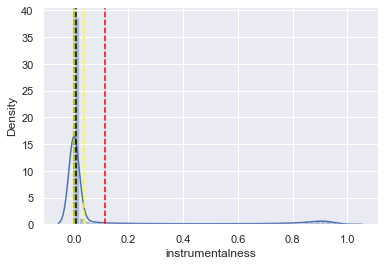

Porcentaje de valores atípicos: 20.401007718111654
Valores atípicos de la variable seleccionada:
0         0.744
3         0.918
4         0.130
5         0.247
9         0.933
          ...  
586643    0.872
586657    0.973
586660    0.959
586665    0.961
586666    0.856
Name: instrumentalness, Length: 119687, dtype: float64


In [337]:
analisis_outliers('instrumentalness', 3)

Incluso considerando el valor más grande, dentro los apropiados según la teoría, para **coeficiente** en `analisis_outliers(., .)`, encontramos que el porcentaje de datos atípicos en la variable **instrumentalness** es mayor a **20%**. 

Por lo tanto, no deberíamos imputar esta variable.

#### liveness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


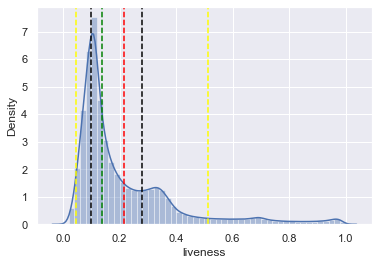

Porcentaje de valores atípicos: 9.510424905228135
Valores atípicos de la variable seleccionada:
19        0.929
24        0.633
33        0.778
46        0.725
48        0.556
          ...  
586619    0.684
586627    0.601
586631    0.697
586638    0.596
586642    0.756
Name: liveness, Length: 55795, dtype: float64


In [340]:
analisis_outliers('liveness', 1.3)

In [341]:
# Hallemos los índices de los outliers en la columna liveness
indices_outliers_liveness = indices_outliers("liveness", 1.3)
dfnum.loc[indices_outliers_liveness, "liveness"]

19        0.929
24        0.633
33        0.778
46        0.725
48        0.556
          ...  
586619    0.684
586627    0.601
586631    0.697
586638    0.596
586642    0.756
Name: liveness, Length: 55795, dtype: float64

#### valence

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


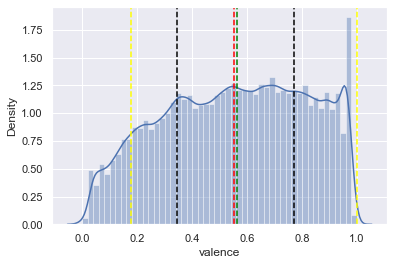

Porcentaje de valores atípicos: 9.002645430496086
Valores atípicos de la variable seleccionada:
0         0.1270
5         0.0539
73        0.1350
85        0.1110
93        0.1530
           ...  
586641    0.1270
586642    0.0639
586643    0.0393
586654    0.1400
586669    0.0663
Name: valence, Length: 52816, dtype: float64


In [344]:
analisis_outliers('valence', 1.4)

In [345]:
# Hallemos los índices de los outliers en la columna valence
indices_outliers_valence = indices_outliers("valence", 1.4)
dfnum.loc[indices_outliers_valence, "valence"]

0         0.1270
5         0.0539
73        0.1350
85        0.1110
93        0.1530
           ...  
586641    0.1270
586642    0.0639
586643    0.0393
586654    0.1400
586669    0.0663
Name: valence, Length: 52816, dtype: float64

#### tempo

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


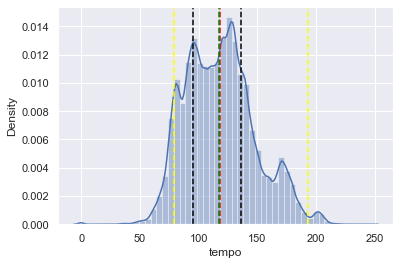

Porcentaje de valores atípicos: 8.905998581831074
Valores atípicos de la variable seleccionada:
9         75.595
15        78.453
16        59.613
18        76.403
20        76.576
           ...  
586606    75.139
586610    63.223
586650    51.414
586657    68.619
586665    63.696
Name: tempo, Length: 52249, dtype: float64


In [350]:
analisis_outliers('tempo', 1.4)

In [351]:
# Hallemos los índices de los outliers en la columna tempo
indices_outliers_tempo = indices_outliers("tempo", 1.4)
dfnum.loc[indices_outliers_tempo, "tempo"]

9         75.595
15        78.453
16        59.613
18        76.403
20        76.576
           ...  
586606    75.139
586610    63.223
586650    51.414
586657    68.619
586665    63.696
Name: tempo, Length: 52249, dtype: float64

**PENDIENTE REVISAR EL RESTO DE NUMERICAS EN LAS SIGUIENTES FILAS** 

In [105]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Construimos el modelo
imputer = IterativeImputer(random_state=2020)

In [106]:
imputer.fit(dfnum[['loudness', ]])
dfnum[['loudness']] = imputer.transform(dfnum[['loudness']])

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


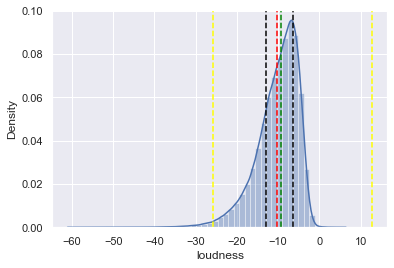

0.23812283524695232
12.745000000000001
-25.709


In [119]:
coeficiente = 3

analisis_outliers('loudness', coeficiente)

# Ubiquemos los outliers de la columna tempo
q1 = dfnum["loudness"].quantile(0.25)
q3 = dfnum["loudness"].quantile(0.75)
iqr = q3 - q1
ul = q3 + coeficiente*iqr
ll = q1 - coeficiente*iqr
outlier = (dfnum["loudness"] > ul) | (dfnum["loudness"] < ll)
dfnum[['loudness']].loc[outlier]

print((dfnum[['loudness']].loc[outlier].shape[0]/dfnum[['loudness']].shape[0])*100)
print((Percentiles["loudness"].loc['75%'] + (coeficiente* (Percentiles["loudness"].loc['75%']-Percentiles["loudness"].loc['25%']))))
print(Percentiles["loudness"].loc['75%'] - (coeficiente* (Percentiles["loudness"].loc['75%']-Percentiles["loudness"].loc['25%'])))


c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


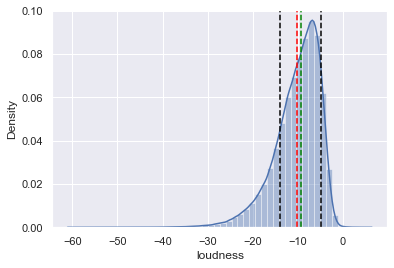

In [107]:
# Variable numérica loudness
# Cuatiles distintos para definir outliers
sns.set(style = "darkgrid")
sns.distplot(dfnum['loudness'])
# plt.axvline(dfnum['loudness'].mean(), color = "green", linestyle = "--")
plt.axvline(dfnum['loudness'].mean(), color = "red", linestyle = "--")
plt.axvline(dfnum['loudness'].median(), color = "green", linestyle = "--")

plt.axvline(dfnum['loudness'].quantile(0.2), color = "black", linestyle = "--")
plt.axvline(dfnum['loudness'].quantile(0.9), color = "black", linestyle = "--")

plt.show()

## nota sensei evelyn

# desahaerce del 2.5% extremo en cada lado,
# reemplazarlo por algún valor
# No imputar más del 10% de los datos.

# transformar a normal 

# probar modelo así como está
# y otro modelos donde data fue imputada

# common practice es considerar 1.5 o 3 como
# el coeficiente que multiplica al RIC.

# Deberían ser ambos coeficientes los mismo,
# tipo, no 1.5 y 3

# ideal es no imputar datos, sino usar modelos robustos a outliers.

# podríamos transformar la variable, tipo con log

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


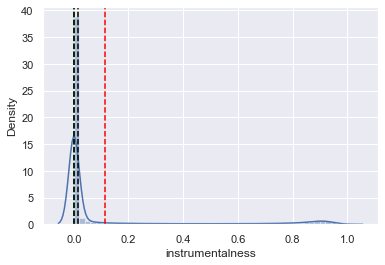

In [108]:
# Variable numérica loudness
# Cuantiles distintos para definir outliers
sns.set(style = "darkgrid")
sns.distplot(dfnum['instrumentalness'])
plt.axvline(dfnum['instrumentalness'].mean(), color = "red", linestyle = "--")
plt.axvline(dfnum['instrumentalness'].median(), color = "green", linestyle = "--")
# plt.axvline(dfnum['instrumentalness'].mean(), color = "green", linestyle = "--")

plt.axvline(dfnum['instrumentalness'].quantile(0), color = "black", linestyle = "--")
plt.axvline(dfnum['instrumentalness'].quantile(0.77), color = "black", linestyle = "--")

plt.show()

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


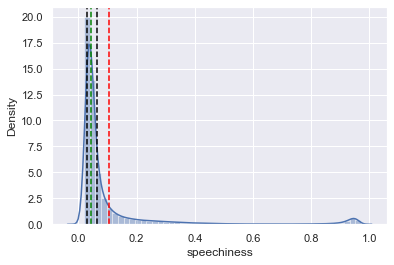

In [109]:
# Variable numérica speechiness
# Cuantiles distintos para definir outliers
sns.set(style = "darkgrid")
sns.distplot(dfnum['speechiness'])
plt.axvline(dfnum['speechiness'].mean(), color = "red", linestyle = "--")
plt.axvline(dfnum['speechiness'].median(), color = "green", linestyle = "--")

plt.axvline(dfnum['speechiness'].quantile(0.15), color = "black", linestyle = "--")
plt.axvline(dfnum['speechiness'].quantile(0.7), color = "black", linestyle = "--")

plt.show()

In [110]:
# Podemos definir una función que encuentre outliers para cualquier columna numérica
def loc_outliers(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  ll = q1 - 1.5*iqr
  return (df[columna] > ul) | (df[columna] < ll) 

In [111]:
# Define una función que encuentre todos los outliers por exceso
def loc_outliers_exceso(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  return (df[columna] > ul)

# Define una función que encuentre todos los outliers por defecto
def loc_outliers_defecto(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ll = q1 - 1.5*iqr
  return (df[columna] < ll)

In [112]:
# Reemplazamos todos los outliers por exceso de la columna "antiguedad" por el máximo valor no outlier
for col in columnas:
  dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)==False, col].max()
  dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)==False, col].min()

# se recomienda imputar de manera individual, debido a que
# los cortes de clase son teóricos, para el caso de distri. normal .
# Caso distri. no normal: c20 c90 como nuevos extremos, no los quartiles clasicos

NameError: name 'dfnum_outlier' is not defined

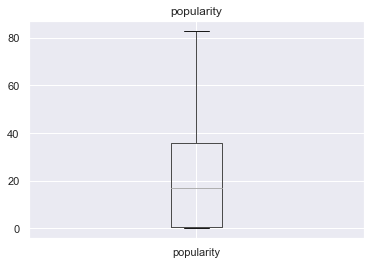

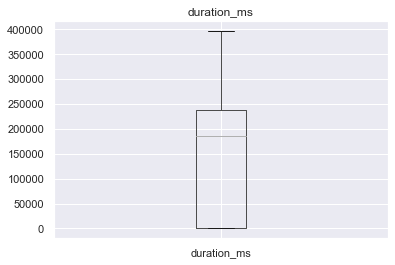

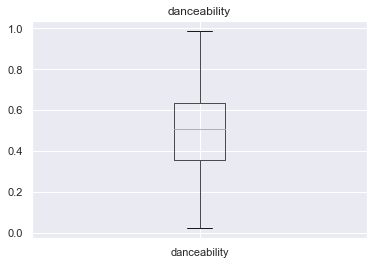

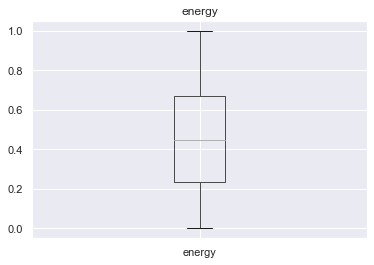

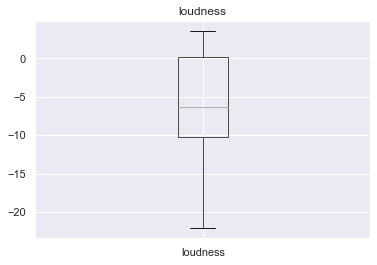

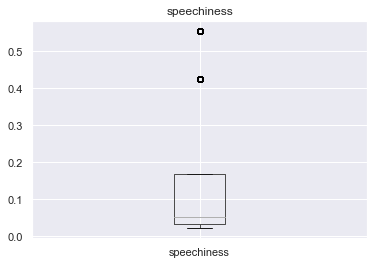

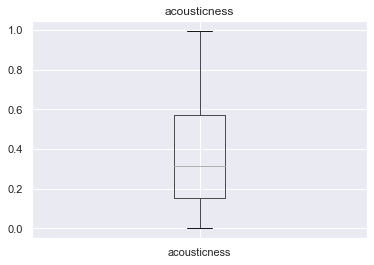

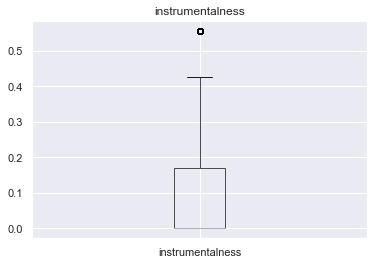

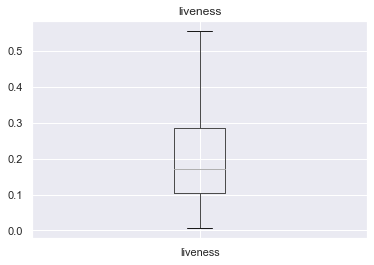

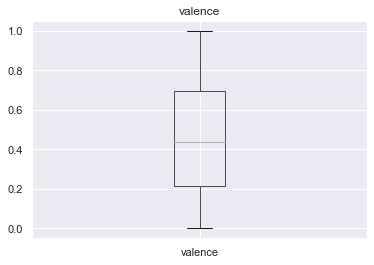

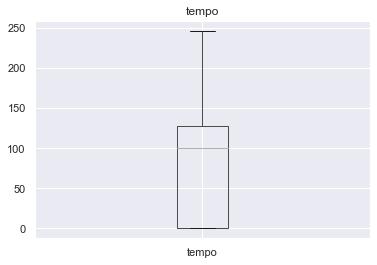

In [ ]:
# Volvemos a generar boxplots para verificar imputaciones
for col in columnas:
  dfnum_outlier.boxplot(column = col)
  plt.title(col)
  plt.show()

### Transformación de variables

In [369]:
## incluir metricas sobre name para tener nuevas variables
## buscamos contar el numero de caracteres de la variable name sin contar los espacios
## creamos una nueva columna donde se guardaran los nombres
dfcat["name_sin_espacios"] = dfcat["name"].str.replace(' ','')

In [370]:
# Ahora tomamos la longitud de la cadena pero de la columna que ya no tiene espacios y creamos la nueva variable 
dfcat["Name_Length"] = dfcat["name_sin_espacios"].str.len() 
# Creamos una nueva variable para llevar el contros de la cantidad de palabras que tiene el nombre 
dfcat["words_name"] = dfcat["name"].str.split().str.len()

In [371]:
# eliminamos la variable auxiliar que creamos
dfcat.drop(["name_sin_espacios"], axis = 1, inplace = True)

In [372]:
dfcat

,id,name,explicit,artists,id_artists,release_date,key,mode,time_signature,Name_Length,words_name
0,35iwgR4jXetI318WEWsa1Q,Carve,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0,1,3,5,1
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0,1,1,31,5
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,1,1,5,30,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,7,1,3,26,4
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,3,0,4,16,4
...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0,0,4,3,1
586668,0NuWgxEp51CutD2pJoF4OM,blind,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0,1,4,5,1
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,7,0,4,21,5
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,10,1,4,11,5


In [373]:
# como vimos en pasos anteriores la columna name por si sola no nos daba información relevante, 
# pero no podía ser eliminada porque se usaría en este paso
#Ahora que ya fue usada podemos eliminarla
dfcat.drop(["name"], axis = 1, inplace = True)

### Transformación de variables time_signature y release_date

In [374]:
# Creo nuevas columnas que asumiran el valor del año, mes y día de la fecha de lanzamiento
dfcat['release_year'] = pd.DatetimeIndex(dfcat['release_date']).year
dfcat['release_month'] = pd.DatetimeIndex(dfcat['release_date']).month
dfcat['release_day'] = pd.DatetimeIndex(dfcat['release_date']).day

In [375]:
# Crearé también una columna que divida a los meses de lanzamiento por trimestres 
release_trim = []
size = len(dfcat['release_date'])

for i in range(size):
  if(dfcat['release_date'][i].month > 0 and dfcat['release_date'][i].month < 4):
    release_trim.append(1)
  if(dfcat['release_date'][i].month > 3 and dfcat['release_date'][i].month < 7):
    release_trim.append(2)
  if(dfcat['release_date'][i].month > 6 and dfcat['release_date'][i].month < 10):
    release_trim.append(3)
  if(dfcat['release_date'][i].month > 9 and dfcat['release_date'][i].month < 13):
    release_trim.append(4)

In [376]:
dfcat['release_trim'] = release_trim
dfcat.head()

,id,explicit,artists,id_artists,release_date,key,mode,time_signature,Name_Length,words_name,release_year,release_month,release_day,release_trim
0,35iwgR4jXetI318WEWsa1Q,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0,1,3,5,1,1922,2,22,1
1,021ht4sdgPcrDgSk7JTbKY,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0,1,1,31,5,1922,6,1,2
2,07A5yehtSnoedViJAZkNnc,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,1,1,5,30,5,1922,3,21,1
3,08FmqUhxtyLTn6pAh6bk45,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,7,1,3,26,4,1922,3,21,1
4,08y9GfoqCWfOGsKdwojr5e,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,3,0,4,16,4,1922,1,1,1


In [377]:
# Finalmente elimino la columna release_date
del dfcat['release_date']

In [ ]:
## Ahora trataremos time_signature

In [378]:
# Crearemos una lista que reemplazará los valores de time signature, si van de 0 a 3 entonces tomarán 0; en caso contrario tomaran 1
list_time = []
for i in range(size):
  if(int(dfcat['time_signature'][i])>=0 and int(dfcat['time_signature'][i])<4):
    list_time.append('0')
  if(int(dfcat['time_signature'][i])>=4):
    list_time.append('1')

In [379]:
del dfcat['time_signature']
dfcat['time_signature'] = list_time
dfcat.head()

,id,explicit,artists,id_artists,key,mode,Name_Length,words_name,release_year,release_month,release_day,release_trim,time_signature
0,35iwgR4jXetI318WEWsa1Q,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0,1,5,1,1922,2,22,1,0
1,021ht4sdgPcrDgSk7JTbKY,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0,1,31,5,1922,6,1,2,0
2,07A5yehtSnoedViJAZkNnc,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1,1,30,5,1922,3,21,1,1
3,08FmqUhxtyLTn6pAh6bk45,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],7,1,26,4,1922,3,21,1,0
4,08y9GfoqCWfOGsKdwojr5e,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],3,0,16,4,1922,1,1,1,1
